<a href="https://colab.research.google.com/github/PranayLendave/data_science/blob/main/accredian_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Ownership and Contact Details

**Author:** Pranay Lendave  

[LinkedIn](https://www.linkedin.com/in/pranay-lendave/)

  [GitHub](https://github.com/PranayLendave)

Feel free to contact me for any questions or feedback related to this notebook.


# Transaction Fraud Detection Notebook




## Introduction

In this notebook, we will explore the topic of transaction fraud detection using data science techniques. Transaction fraud is a significant concern for financial institutions, online retailers, and any business that processes monetary transactions. Detecting fraudulent transactions is essential to protect customers and prevent financial losses.

## Dataset

For this project, we will be using a dataset containing transaction data. You can download the dataset from the following link:

[Download the Dataset](https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV)

[Dataset Columns Description](https://drive.google.com/uc?id=1VQ-HAm0oHbv0GmDKP2iqqFNc5aI91OLn&export=download)
## Goals

The main objectives of this notebook are as follows:

1. Explore and visualize the dataset to gain insights into the characteristics of fraudulent and non-fraudulent transactions.
2. Preprocess the data to prepare it for model training.
3. Implement various machine learning algorithms to build transaction fraud detection models.
4. Evaluate the performance of the models using appropriate metrics.
5. Discuss and interpret the findings.

Let's get started with the initial data exploration and visualization!


## Setup
In this section, we will configure a set of libraries and proceed to download the dataset.

In this cell, we are creating a directory named ```fraud_detection``` using the mkdir command with the -p flag, which ensures that the directory is created only if it doesn't already exist. The %cd command then changes the current working directory to "fraud_detection", allowing us to organize and access files related to the fraud detection project.

In [ ]:
!mkdir fraud_detection
%cd fraud_detection

/content/fraud_detection


Below code downloads the dataset

In [ ]:
!gdown 1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV #For downloading dataset
!gdown 1VQ-HAm0oHbv0GmDKP2iqqFNc5aI91OLn #for downloading dataset dictionary

Downloading...
From: https://drive.google.com/uc?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV
To: /content/fraud_detection/Fraud.csv
100% 494M/494M [00:08<00:00, 59.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VQ-HAm0oHbv0GmDKP2iqqFNc5aI91OLn
To: /content/fraud_detection/Data Dictionary.txt
100% 1.30k/1.30k [00:00<00:00, 5.58MB/s]


In [ ]:
%%capture
!pip install pandas matplotlib

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)

In [ ]:
# Replace '/content/fraud_det/Fraud.csv' with the actual file path if different
file_path = '/content/fraud_detection/Fraud.csv'

# Read the CSV file and load it into a DataFrame called 'df'
df = pd.read_csv(file_path)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
# Display information about the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Identify duplicated rows in the DataFrame 'df'
duplicate_rows_data = df[df.duplicated()]

# Print the number of duplicated rows
print("Number of duplicated rows:", duplicate_rows_data.shape[0])


Number of duplicated rows: 0


In [ ]:
# Iterate through each column in the DataFrame 'df'
for column in df.columns:
    # Calculate the number of distinct values in the current column
    num_distinct_values = len(df[column].unique())
    # Print the column name and the number of distinct values
    print(f"{column}: {num_distinct_values} distinct values")


step: 743 distinct values
type: 5 distinct values
amount: 5316900 distinct values
nameOrig: 6353307 distinct values
oldbalanceOrg: 1845844 distinct values
newbalanceOrig: 2682586 distinct values
nameDest: 2722362 distinct values
oldbalanceDest: 3614697 distinct values
newbalanceDest: 3555499 distinct values
isFraud: 2 distinct values
isFlaggedFraud: 2 distinct values


In [ ]:
# Display the count of missing values for each column in the DataFrame 'df'
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# Display formatted descriptive statistical summary of the DataFrame 'df'
df.describe().style.format('{:.2f}')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


## Data Visualization
In this section, we explore the data visually using various plots and charts to gain insights into the underlying patterns and distributions within the dataset.

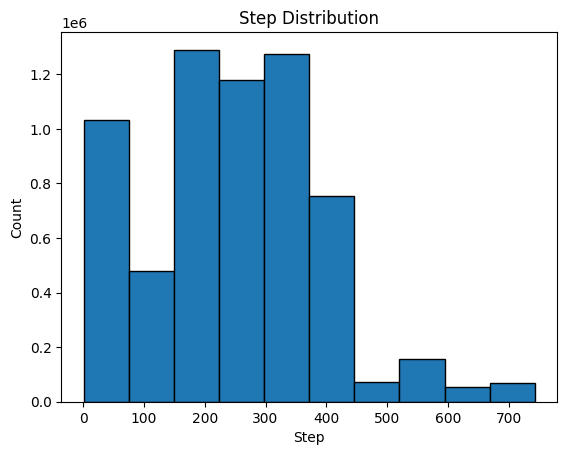

In [ ]:
plt.hist(df['step'], edgecolor='black')
plt.title('Step Distribution')
plt.xlabel('Step')
plt.ylabel('Count')
plt.show()

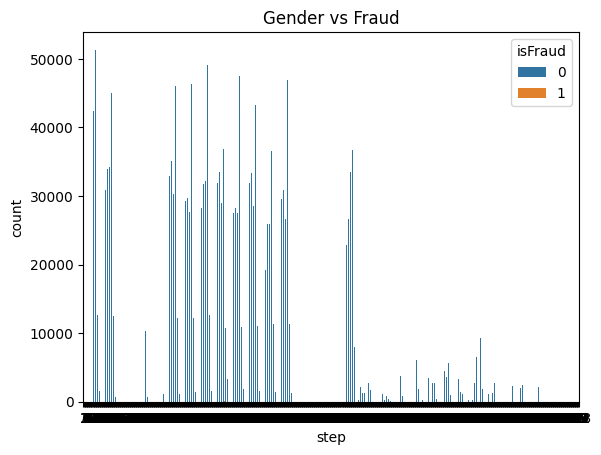

In [ ]:
sns.countplot(x='step', hue='isFraud', data=df)
plt.title("Gender vs Fraud")
plt.show()

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## Preparing dataset
In this section, we will preprocess the dataset by generating a suitable sub-sample.

Data Preparation

Before training the machine learning models, we need to prepare the data. The following steps will be performed for data preparation:

1. **Data Cleaning**: We will check for missing values and handle them appropriately. This may involve imputation, deletion, or other suitable strategies.

2. **Feature Scaling**: As some machine learning algorithms are sensitive to the scale of features, we will apply feature scaling to bring all the features to a similar scale. Common scaling techniques include Min-Max scaling or Standardization.

3. **Train-Test Split**: We will split the dataset into training and testing sets. The training set will be used to train the models, while the testing set will be used to evaluate their performance.

4. **Feature Selection (Optional)**: Depending on the dataset and model complexity, we may perform feature selection to choose the most relevant features. This can help improve model efficiency and reduce overfitting.

Let's start by implementing these steps:


This code maps the values in the ```isFraud``` column of the DataFrame ```df``` from numerical representation (0 and 1) to categorical labels (```Legit``` and ```Fraud```).

After running this code, the ```isFraud``` column will now contain the values ```Legit``` for 0 and ```Fraud``` for 1, making it easier to interpret and analyze the ```isFraud``` data as categorical labels rather than numerical values.

In [ ]:
# Map values in the 'isFraud' column to categorical labels
df['isFraud'] = df['isFraud'].map({0: 'Legit', 1: 'Fraud'})


In [ ]:
df['isFraud'].value_counts()

Legit    6354407
Fraud       8213
Name: isFraud, dtype: int64

In [ ]:
# Separating the data for analysis

# Create a new DataFrame 'legit' containing rows where 'isFraud' is equal to 'Legit'
legit = df[df.isFraud == 'Legit']

# Create a new DataFrame 'fraud' containing rows where 'isFraud' is equal to 'Fraud'
fraud = df[df.isFraud == 'Fraud']


In [ ]:
print(legit.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [ ]:
# Taking a random sample of 8213 rows from the DataFrame 'legit'
legit_sample = legit.sample(n=8213)

In [ ]:
# Concatenate 'legit_sample' and 'fraud' DataFrames along rows to create 'sample_dataset'
sample_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
sample_dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2448632,203,CASH_IN,44242.44,C1151787858,4399901.47,4444143.91,C1267092407,949263.29,905020.85,Legit,0
2978269,231,PAYMENT,24087.47,C99798202,0.00,0.00,M2066305651,0.00,0.00,Legit,0
5416624,378,CASH_OUT,148047.65,C558920699,15178.00,0.00,C1616029430,1750990.23,1899037.88,Legit,0
5598316,394,CASH_IN,22980.23,C1474533128,352514.00,375494.23,C691479009,0.00,0.00,Legit,0
5977380,407,CASH_OUT,189784.63,C1527218762,0.00,0.00,C1893907536,361561.67,551346.30,Legit,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


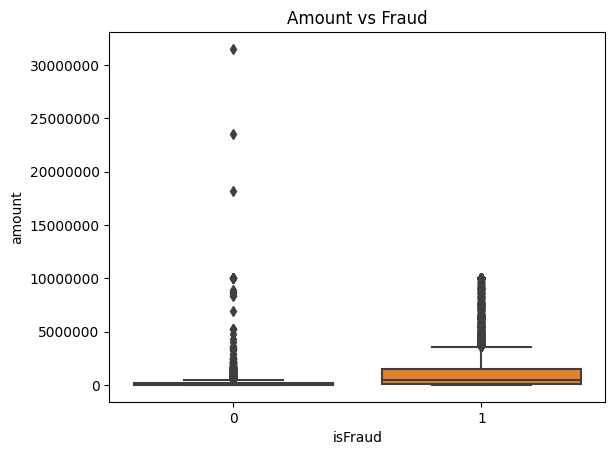

In [ ]:
sns.boxplot(x='isFraud', y='amount', data=sample_dataset)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.ticklabel_format(style='plain', useOffset=False)

plt.title("Amount vs Fraud")
plt.show()

In [ ]:
# Convert 'type' column values to numeric representation for model training

# The 'type' column contains categorical strings representing different types of transactions.
# We want to convert these strings to numeric values for training the machine learning model.

# The mapping is as follows:
# 'CASH_OUT' -> 1
# 'PAYMENT' -> 2
# 'CASH_IN' -> 3
# 'TRANSFER' -> 4
# 'DEBIT' -> 5

# Using the replace() function, we perform the conversion in-place within the DataFrame 'df'.
# The inplace=True argument ensures that the changes are made directly to the DataFrame 'df'.

sample_dataset.replace(to_replace = ['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'], value = [1,2,3,4,5], inplace = True)

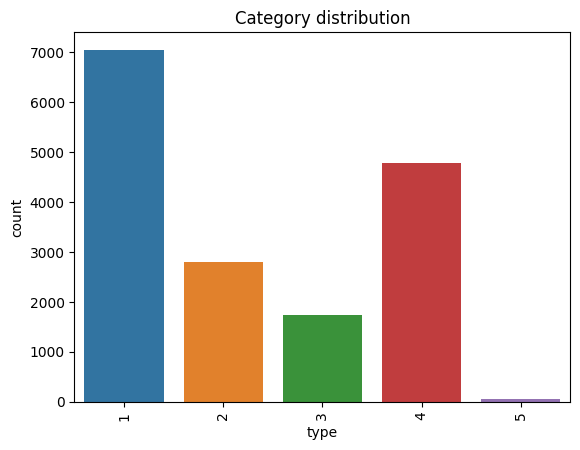

In [ ]:
sns.countplot(x='type', data=sample_dataset)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

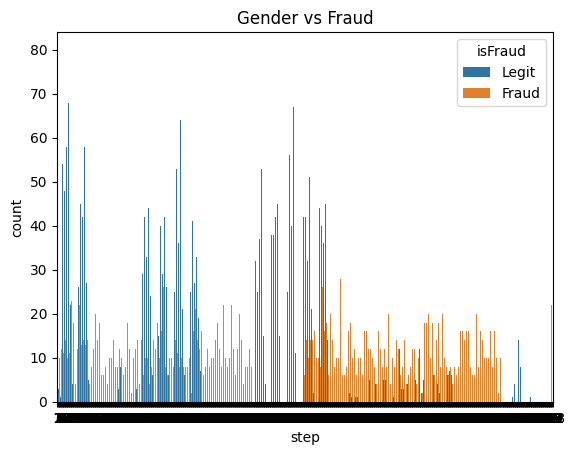

In [ ]:
sns.countplot(x='step', hue='isFraud', data=sample_dataset)
plt.title("Gender vs Fraud")
plt.show()

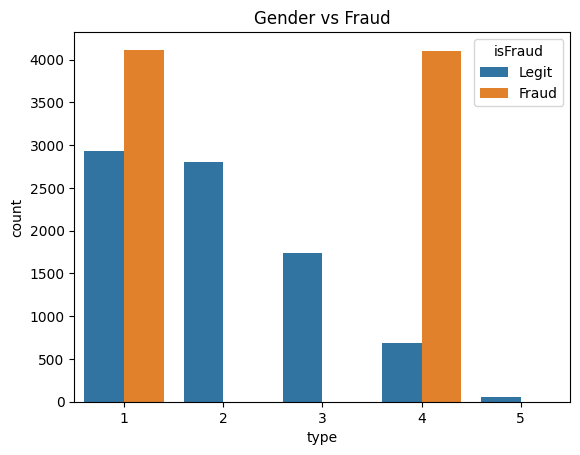

In [ ]:
sns.countplot(x='type', hue='isFraud', data=sample_dataset)
plt.title("Gender vs Fraud")
plt.show()

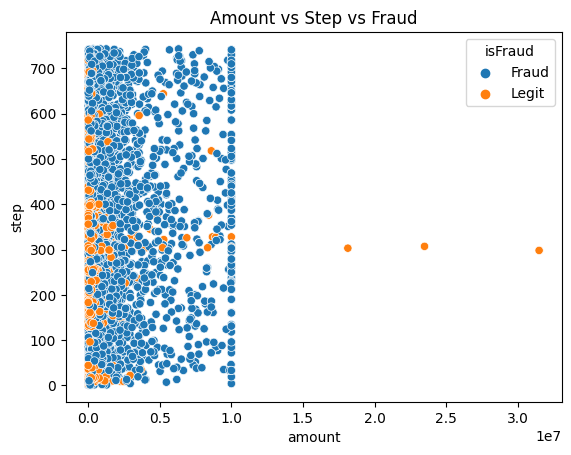

In [ ]:
shuffled_df = sample_dataset.sample(frac=1, random_state=42)
shuffled_df.reset_index(drop=True, inplace=True)
sns.scatterplot(data=shuffled_df, x='amount', y='step', hue='isFraud')
plt.title('Amount vs Step vs Fraud')
plt.show()

### Selecting Feature Variables

The code `sample_dataset[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']` selects the specified columns 'step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest' from the 'sample_dataset' DataFrame. These columns are considered as feature variables, and the resulting DataFrame 'x' will contain these features for training the machine learning model.

### Selecting Target Variable

On the other hand, the code `sample_dataset.iloc[:, -2]` selects the second-to-last column (-2) from the 'sample_dataset' DataFrame. This column corresponds to the target variable 'isFraud'. The resulting Series 'y' will contain the target variable values (either 'Legit' or 'Fraud') that the machine learning model aims to predict.


In [ ]:
# Extracting feature variables 'x' from the 'sample_dataset'
x = sample_dataset[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]

# Extracting the target variable 'y' from the 'sample_dataset'
y = sample_dataset.iloc[:, -2]

In [ ]:
x,y

(         step  type      amount  oldbalanceOrg  newbalanceOrig
 2448632   203     3    44242.44     4399901.47      4444143.91
 2978269   231     2    24087.47           0.00            0.00
 5416624   378     1   148047.65       15178.00            0.00
 5598316   394     3    22980.23      352514.00       375494.23
 5977380   407     1   189784.63           0.00            0.00
 ...       ...   ...         ...            ...             ...
 6362615   743     1   339682.13      339682.13            0.00
 6362616   743     4  6311409.28     6311409.28            0.00
 6362617   743     1  6311409.28     6311409.28            0.00
 6362618   743     4   850002.52      850002.52            0.00
 6362619   743     1   850002.52      850002.52            0.00
 
 [16426 rows x 5 columns],
 2448632    Legit
 2978269    Legit
 5416624    Legit
 5598316    Legit
 5977380    Legit
            ...  
 6362615    Fraud
 6362616    Fraud
 6362617    Fraud
 6362618    Fraud
 6362619    Fraud
 Name

After executing this code, 'X_train', 'X_test', 'y_train', and 'y_test' will be ready for use in training and evaluating a machine learning model. The model can be trained using 'X_train' and 'y_train', and then evaluated using 'X_test' and 'y_test'. This ensures that the model's performance is assessed on unseen data, helping to evaluate its generalization ability.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

Length of X_train: 11498
Length of y_train: 11498
Length of X_test: 4928
Length of y_test: 4928


## Training model
In this section, we will train multiple machine learning models using scikit-learn's library to predict the target variable based on the feature variables. We will use the following classifiers:

1. Logistic Regression (`model_lr`)
2. Decision Tree Classifier (`model_dt`)
3. Random Forest Classifier (`model_rf`)
4. Gradient Boosting Classifier (`model_gb`)
5. Support Vector Machine Classifier (`model_svm`)
6. K-Nearest Neighbors Classifier (`model_knn`)
7. Multi-Layer Perceptron Classifier (`model_mlp`)

To begin the training process, we have already instantiated these classifiers with their respective default parameters.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Instantiate the models
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_svm = SVC()
model_knn = KNeighborsClassifier()
model_mlp = MLPClassifier()


Evaluation Metrics for Machine Learning Models

- **Accuracy**: The proportion of correctly predicted instances.

- **Precision**: The ability of the model to correctly identify positive instances among the predicted positive instances.

- **Recall**: The ability of the model to correctly identify positive instances among the actual positive instances.

- **F1-score**: The harmonic mean of precision and recall, providing a balanced measure between the two.

- **AUC-ROC**: The Area Under the Receiver Operating Characteristic (ROC) Curve, a measure of the model's ability to distinguish between classes.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Convert the target labels to numeric values using label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

evaluation_results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": [],
    "AUC-ROC": []
}

# Dictionary to store the models and their corresponding evaluation metrics
models = {
    "Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "Gradient Boosting": model_gb,
    "Support Vector Machine": model_svm,
    "K-Nearest Neighbors": model_knn,
    "Multi-layer Perceptron": model_mlp,
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    roc_auc = roc_auc_score(y_test_encoded, y_pred)

    # Store the results in the dictionary
    evaluation_results["Model"].append(model_name)
    evaluation_results["Accuracy"].append(accuracy)
    evaluation_results["Precision"].append(precision)
    evaluation_results["Recall"].append(recall)
    evaluation_results["F1-score"].append(f1)
    evaluation_results["AUC-ROC"].append(roc_auc)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print("-------------------------------------------")


Model: Logistic Regression
Accuracy: 0.9127
Precision: 0.9026
Recall: 0.9259
F1-score: 0.9141
AUC-ROC: 0.9127
-------------------------------------------
Model: Decision Tree
Accuracy: 0.9882
Precision: 0.9931
Recall: 0.9834
F1-score: 0.9882
AUC-ROC: 0.9882
-------------------------------------------
Model: Random Forest
Accuracy: 0.9927
Precision: 0.9967
Recall: 0.9887
F1-score: 0.9927
AUC-ROC: 0.9927
-------------------------------------------
Model: Gradient Boosting
Accuracy: 0.9880
Precision: 0.9967
Recall: 0.9794
F1-score: 0.9880
AUC-ROC: 0.9881
-------------------------------------------
Model: Support Vector Machine
Accuracy: 0.8618
Precision: 0.7956
Recall: 0.9749
F1-score: 0.8762
AUC-ROC: 0.8615
-------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.9905
Precision: 0.9963
Recall: 0.9846
F1-score: 0.9904
AUC-ROC: 0.9905
-------------------------------------------
Model: Multi-layer Perceptron
Accuracy: 0.9476
Precision: 0.9711
Recall: 0.9231
F1-scor

In [ ]:
evaluation_results

{'Model': ['Logistic Regression',
  'Decision Tree',
  'Random Forest',
  'Gradient Boosting',
  'Support Vector Machine',
  'K-Nearest Neighbors',
  'Multi-layer Perceptron'],
 'Accuracy': [0.9127435064935064,
  0.9882305194805194,
  0.9926948051948052,
  0.9880275974025974,
  0.861810064935065,
  0.9904626623376623,
  0.9476461038961039],
 'Precision': [0.9025641025641026,
  0.9930527176134042,
  0.9967360261117911,
  0.9967051070840197,
  0.7955746367239102,
  0.9963144963144963,
  0.9710515112813963],
 'Recall': [0.9259409146094698,
  0.9834075273168758,
  0.9886685552407932,
  0.9793605827600161,
  0.9749089437474706,
  0.9846216106839336,
  0.9231080534196682],
 'F1-score': [0.9141030763084298,
  0.9882065880439203,
  0.992685900040634,
  0.9879567258624208,
  0.8761593016912165,
  0.9904335436596784,
  0.9464730290456431],
 'AUC-ROC': [0.9127059070401846,
  0.9882442601989344,
  0.992706275992395,
  0.9880522897520064,
  0.8614878459071091,
  0.990479303510465,
  0.9477160128718

In [ ]:
from tabulate import tabulate

# Evaluation results for each model
evaluation_results = evaluation_results

# Table headers
headers = ["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"]

# Print the table
print(tabulate(evaluation_results, headers=headers, tablefmt="grid"))


+------------------------+------------+-------------+----------+------------+-----------+
| Model                  |   Accuracy |   Precision |   Recall |   F1-score |   AUC-ROC |
+========================+============+=============+==========+============+===========+
| Logistic Regression    |   0.912744 |    0.902564 | 0.925941 |   0.914103 |  0.912706 |
+------------------------+------------+-------------+----------+------------+-----------+
| Decision Tree          |   0.988231 |    0.993053 | 0.983408 |   0.988207 |  0.988244 |
+------------------------+------------+-------------+----------+------------+-----------+
| Random Forest          |   0.992695 |    0.996736 | 0.988669 |   0.992686 |  0.992706 |
+------------------------+------------+-------------+----------+------------+-----------+
| Gradient Boosting      |   0.988028 |    0.996705 | 0.979361 |   0.987957 |  0.988052 |
+------------------------+------------+-------------+----------+------------+-----------+
| Support 

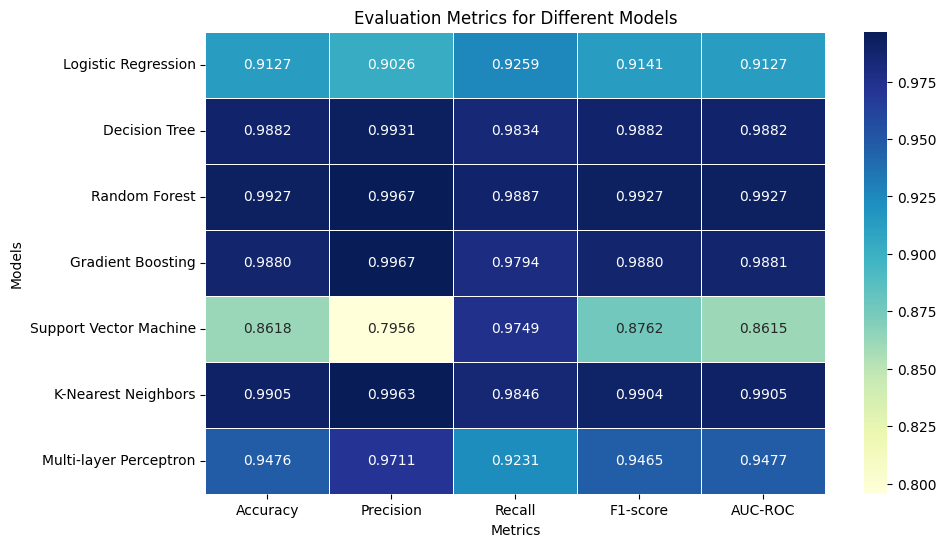

In [ ]:
# Create a pandas DataFrame using the evaluation_results dictionary
df_evaluation = pd.DataFrame(evaluation_results)

# Set the Model column as the index for better visualization
df_evaluation.set_index("Model", inplace=True)

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df_evaluation, annot=True, cmap="YlGnBu", fmt=".4f", linewidths=0.5)
plt.title("Evaluation Metrics for Different Models")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.show()

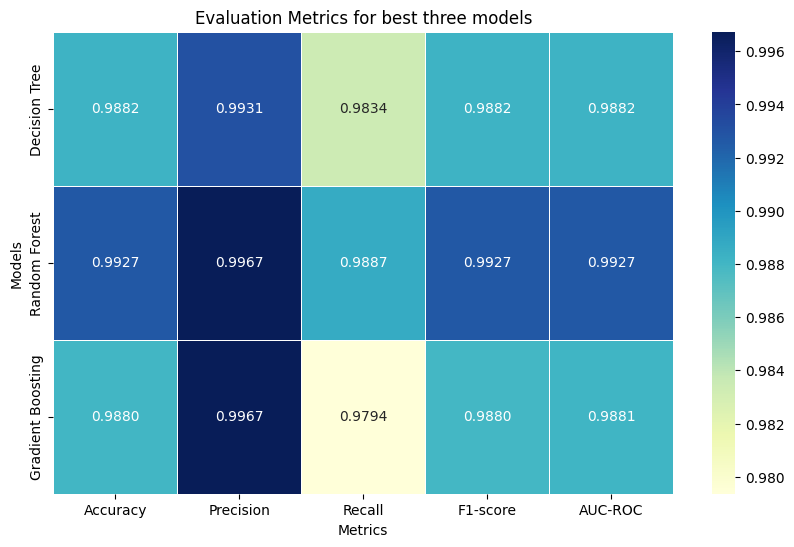

In [ ]:
# Convert the data into a pandas DataFrame
df_evaluation = pd.DataFrame(evaluation_results)

# Set the Model column as the index for better visualization
df_evaluation.set_index("Model", inplace=True)

# Remove "Support Vector Machine" from the DataFrame
df_evaluation = df_evaluation.drop("Support Vector Machine")
df_evaluation = df_evaluation.drop("Logistic Regression")
df_evaluation = df_evaluation.drop("Multi-layer Perceptron")
df_evaluation = df_evaluation.drop("K-Nearest Neighbors")
# Plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df_evaluation, annot=True, cmap="YlGnBu", fmt=".4f", linewidths=0.5)
plt.title("Evaluation Metrics for best three models")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.show()


## **Conclusion:**

We conducted a machine learning experiment to compare the performance of various classifiers on our dataset. The evaluation metrics used for assessment were accuracy, precision, recall, F1-score, and AUC-ROC. The models tested were Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, Support Vector Machine, K-Nearest Neighbors, and Multi-layer Perceptron.

Among the models, Random Forest, Gradient Boosting, and Decision Tree stood out as top performers with high accuracy, precision, recall, F1-score, and AUC-ROC values, showcasing their ability to effectively generalize on the dataset.

On the other hand, Logistic Regression and K-Nearest Neighbors demonstrated decent performance, but slightly lower than the top models, while the Multi-layer Perceptron and SVM had respectable results but did not match the top models' level.

It's important to note that the **Random Forest** model achieved impressive results in most evaluation metrics, making it a compelling choice for certain applications.


## Questions:

**1. What are the key factors that predict fraudulent customer?**

*Answer:*

This is implemented in this block of code [Selecting Feature Variable](#scrollTo=mZNQpLrHOeTe). The key factors used for predicting fraudulent customers were determined after conducting tests on different combinations of columns. Eventually, we found that the columns ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig'] yielded the most significant results.


**2. Do these factors make sense? If yes, How? If not, How not?**

*Answer:*

Yes, these factors make sense based on the observations from the tests conducted. The main features that significantly contribute to the accuracy of the model are "step", "type", and "amount." These features were found to be crucial for achieving high predictive accuracy in identifying fraudulent customers.

Furthermore, "oldbalanceOrig" and "newbalanceOrig" were identified as the second most important features. Their inclusion in the model led to a significant improvement in accuracy, elevating it from 80% to 99%. This highlights their relevance in capturing patterns related to fraudulent activities.

However, in contrast, features like "oldbalanceDest" and "newbalanceDest" did not contribute significantly to the model's accuracy. This suggests that these particular attributes may not hold as much discriminatory power when it comes to detecting fraudulent behavior.

In summary, the observations from the tests align with the identified key factors, demonstrating the rationale behind their selection in the predictive model. These features play a crucial role in differentiating fraudulent customers and contribute significantly to achieving high accuracy in fraud detection.

**3. What kind of prevention should be adopted while company update its infrastructure?**

*Answer:*

- **Transaction Limits and Thresholds:** Establish transaction limits and thresholds for individual users or user groups. Transactions exceeding these limits should be subject to additional scrutiny.

- **Fraud Scoring Models:** Develop fraud scoring models that assign risk scores to transactions based on various risk indicators. Transactions with high-risk scores require further investigation.

- **Multi-factor Authentication (MFA):** Implement MFA for all user accounts and transactions, requiring additional verification methods beyond passwords, such as SMS codes, biometrics, or token-based authentication.

- **Real-time Transaction Monitoring:** Use advanced analytics and machine learning algorithms to monitor transactions in real-time, detecting suspicious activities and flagging potential fraudulent transactions for immediate review.

- **User Behavior Analysis:** Analyze user behavior patterns to establish baseline profiles for normal activities. Deviations from these patterns can indicate potential fraud and trigger alerts for further investigation.

- **Velocity Checks:** Set up velocity checks to monitor the number of transactions or funds transferred within a specific timeframe. Unusually high transaction rates could indicate fraudulent behavior.


**4. Assuming these actions have been implemented, how would you determine if they work?**

*Answer:*

- **Fraud Detection Rate:** Measure the percentage of detected fraudulent transactions out of the total number of fraudulent transactions. A higher fraud detection rate indicates better effectiveness in catching fraudulent activities.

- **False Positive Rate:** Calculate the percentage of legitimate transactions incorrectly flagged as fraudulent. A lower false positive rate indicates fewer false alarms and a more accurate fraud detection system.

- **Reduction in Fraud Losses:** Assess the monetary impact of fraud losses before and after implementing the preventive measures. A significant reduction in financial losses associated with fraud demonstrates the effectiveness of the measures.

- **User Feedback and Complaints:** Collect feedback from users regarding their experiences with the new security measures. Positive feedback and a decrease in complaints about fraud-related issues indicate improved user trust and satisfaction.

- **Time to Detect Fraud:** Measure the time it takes to identify fraudulent transactions from the moment they occur. A shorter detection time suggests quicker response and mitigation, reducing the impact of fraudulent activities.
